In [1]:
import pandas as pd
import numpy as np
from tweet import config

In [2]:
df1 = pd.read_csv(config.data / 'covid19_tweets_id_subset.csv', header = None)
df2 = pd.read_csv(config.data / 'covid19_tweets_id_subset2.csv', header = None)
df3 = pd.read_csv(config.data / 'covid19_tweets_id_subset3.csv', header = None)
df4 = pd.read_csv(config.data / 'covid19_tweets_id_subset4.csv', header = None)
df5 = pd.read_csv(config.data / 'covid19_tweets_id_subset5.csv', header = None)
df6 = pd.read_csv(config.data / 'covid19_tweets_id_subset6.csv', header = None)

In [3]:
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape)

(55534, 13) (53173, 13) (30555, 13) (32118, 13) (60028, 13) (63148, 13)


In [4]:
columns = ['user_name','user_location', 'user_description', 'user_created', 'user_followers', 'user_friends',
           'user_favourites', 'user_verified', 'date', 'full_text', 'hashtags', 'source', 'lang']

df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)
df.columns = columns
df = df.drop_duplicates(subset=['full_text','date','user_name'])
df = df.sort_values('date')
df.shape

(143173, 13)

In [5]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,full_text,hashtags,source,lang
30221,tolu ogunlesi,Lagos/Abuja [Nigeria],Special Assistant to President Buhari on Digit...,2009-03-10 12:11:22,662352,2339,26778,True,2010-02-09 13:28:53,I'm busy. Writing a new constitution for Niger...,NaN,Twitter Web Client,en
442,Guardian Science,London,"Science, health and environment news from the ...",2009-02-22 17:43:35,1118108,2184,120,True,2013-03-15 20:13:39,Coronavirus: Is this the next pandemic? http:/...,NaN,twitterfeed,en
18159,Marco,NaN,Lost in the right direction,2013-03-05 01:28:11,5944,102,4815,False,2013-06-03 15:32:48,Corona virus....its coming,NaN,Twitter for Android,en
5100,Jeremy PLEASE WEAR MASKS! Konyndyk,Washington DC,"Dad, baker, beer snob. Pandemic prep & humanit...",2011-10-25 17:44:25,90029,601,9605,True,2017-02-17 15:53:38,This matters ENORMOUSLY. Outbreak control rest...,NaN,Twitter Web Client,en
20464,keanu doing things,not affiliated with keanu reeves,your #1 source for keanu reeves doing things,2018-03-04 00:59:36,234115,11,382,False,2018-03-04 01:06:09,keanu reeves drinking a corona &amp; having an...,NaN,Twitter Web Client,en


In [6]:
# Add new features

# top10 sources
top_sources = df['source'].value_counts().reset_index().head(10)['index']
df['source_top10'] = np.where(df['source'].isin(top_sources), df['source'], 'other')

# Date related columns
df['date'] = pd.to_datetime(df['date'])
df['date_short'] = df['date'].dt.date
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour

# Tweet related
df['tweet_length'] = df['full_text'].apply(lambda x:len(x))

df.shape

(143173, 18)

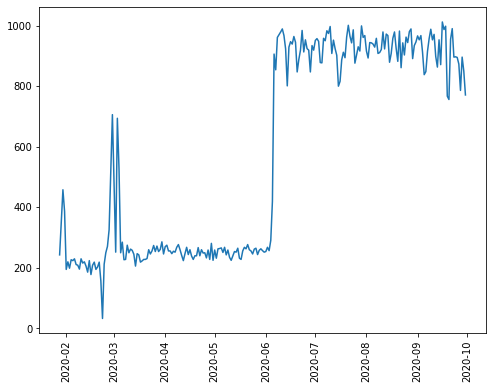

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df['date_short'].value_counts().reset_index().sort_values('index')
tmp['index'] = tmp['index'].apply(lambda x: str(x))
tmp = tmp[tmp['index'] > '2020-01-27']
tmp['index'] = pd.to_datetime(tmp['index'])

plt.figure(figsize=(8,6))
plt.plot(tmp['index'], tmp['date_short'])
plt.xticks(rotation=90)
plt.show()

(array([3.4121e+04, 4.5240e+04, 5.2660e+04, 1.0977e+04, 8.8000e+01,
        1.9000e+01, 1.1000e+01, 1.4000e+01, 2.1000e+01, 2.2000e+01]),
 array([  8. , 104.6, 201.2, 297.8, 394.4, 491. , 587.6, 684.2, 780.8,
        877.4, 974. ]),
 <BarContainer object of 10 artists>)

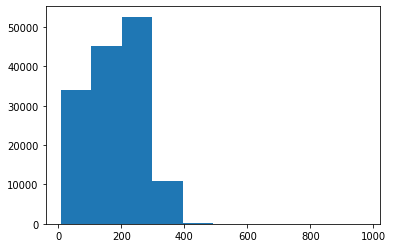

In [8]:
plt.hist(df['tweet_length'])

In [9]:
df.to_csv(config.data / 'covid19_tweets_clean.csv', index = None)